In [1]:
import numpy as np

inputarray = np.genfromtxt('example_1.4_0.8.dat')
findchirp_array = np.genfromtxt('example_1.4_0.8_findchirp.dat')

d = 100.0

In [2]:
import snrcalculatorfuns as snr

In [3]:
z = snr.polynomial_redshift(d)
inputarray = snr.redshift_distance_adjustment(inputarray,d,z) #note self-reference

In [4]:
freqmax, freqmin = snr.frequency_limits(inputarray)

In [5]:
fourieramp = snr.findchirp_fourier(inputarray,findchirp_array,d,z)

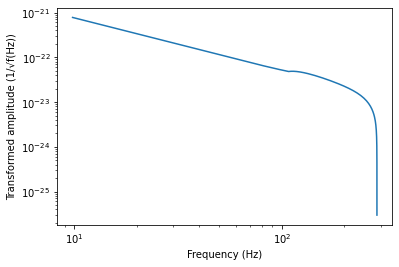

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(inputarray[:,1],fourieramp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transformed amplitude (1/√f(Hz))')
plt.xscale('log')
plt.yscale('log')

In [7]:
ind_SNR = np.empty((3))
for i in range(3): #three detectors
    if i == 0:
        noisearray = np.genfromtxt('noise_spectra/o3_l1.txt') #LIGO Livingston
    elif i == 1:
        noisearray = np.genfromtxt('noise_spectra/o3_h1.txt') #LIGO Hanford
    elif i == 2:
        noisearray = np.genfromtxt('noise_spectra/o3_v1.txt') #Virgo
    #the noise spectra are not included in this repository for copyright reasons,
    #but the ones used for this example can be found at the following link:
    #https://dcc.ligo.org/LIGO-T1500293/public
    
    noise_freq_amp = snr.amplitude_interpolation(inputarray,fourieramp,noisearray,freqmax,freqmin)
    ind_SNR[i] = snr.individual_detector_SNR(noisearray,noise_freq_amp)

quad_SNR = np.sqrt(ind_SNR[0]**2 + ind_SNR[1]**2 + ind_SNR[2]**2)

print("Livingston SNR is %.1f, Hanford SNR is %.1f, Virgo SNR is %.1f. \n"
     "The quadrature SNR is %.1f." % (ind_SNR[0],ind_SNR[1],ind_SNR[2],quad_SNR))

Livingston SNR is 284.8, Hanford SNR is 222.6, Virgo SNR is 107.6. 
The quadrature SNR is 377.2.
